#### **Integração Numérica - Método dos trapézios**

In [632]:
import numpy as np 
import pandas as pd
import sympy as sp 
import matplotlib.pyplot as plt

Entrada

In [633]:
a, b = 0, 1
n_trapezios = 12_900
n_casas_decimais = 6
expr = 4 / (1 + x ** 2)

Dominio, Imagem e a Integral simbólica

In [634]:
x = sp.Symbol('x')
f = sp.lambdify(x, expr)

dom = np.linspace(a, b, n_trapezios+1)
img = f(dom)

print('Resolvendo a Integral: ')
sp.Integral(expr, (x, a, b))

Resolvendo a Integral: 


Integral(4/(x**2 + 1), (x, 0, 1))

Soma das áreas dos trapézios

In [635]:
h = (b - a) / (n_trapezios)
soma = img[0] + 2 * np.sum(img[1:-1]) + img[-1]
area = soma * (h/2)

print(f'Área aproximada: {area:.{n_casas_decimais}f}')

Área aproximada: 3.141593


Tabela

In [636]:
#pd.options.display.max_rows = 20
#pd.set_option('display.float_format', '{:.7f}'.format)

tabela = pd.DataFrame({'x': dom, 'f(x)': img})
tabela = tabela.round({'f(x)': n_casas_decimais})

tabela


,x,f(x)
0,0.000000,4.000000
1,0.000078,4.000000
2,0.000155,4.000000
3,0.000233,4.000000
4,0.000310,4.000000
...,...,...
12896,0.999690,2.000620
12897,0.999767,2.000465
12898,0.999845,2.000310
12899,0.999922,2.000155


In [637]:
def apresenta(erro,limite, n_casas_decimais):
    form = '.2e' if erro < limite else f'.{n_casas_decimais}f'
    return form

limite = 1e-5

Erro de arredondamento

In [638]:
decimal = 5 / (10 ** (n_casas_decimais + 1) )
erro_arr = n_trapezios * decimal * h

form = apresenta(erro_arr, limite, n_casas_decimais)
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_arr:{form}})'
intervalo2 =  f'[{area - erro_arr:.{n_casas_decimais}f} ; {area+erro_arr:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.141593 ± 5.00e-07)

[3.141592 ; 3.141593]


Gráfico

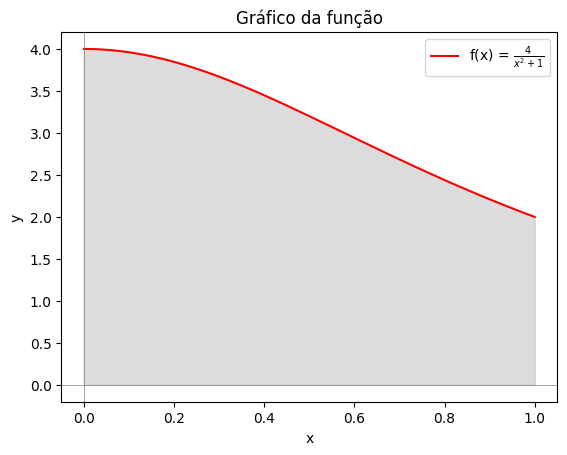

In [639]:
plt.plot(dom, img, label= f'f(x) = ${sp.latex(expr)}$', color='red')

plt.fill_between(dom, img, color='darkgrey', alpha=0.4, ) 
plt.title('Gráfico da função')

plt.xlabel('x'); plt.ylabel('y')
plt.axhline(0, color='gray',linewidth=0.5)  
plt.axvline(0, color='gray',linewidth=0.5) 

plt.legend(loc='upper right')

plt.show()


Erro de truncamento

In [640]:
out = sp.diff(sp.diff(expr))

f2 = sp.lambdify(x, out)

erro_trunc = n_trapezios * ((h**3) / (12)) * max(abs(f2(a)), abs(f2(b)))
form = apresenta(erro_trunc, limite, n_casas_decimais)

print(f'{erro_trunc:{form}}')


4.01e-09


Erro total

In [641]:
erro_total = erro_arr + erro_trunc

form = apresenta(erro_total, limite, n_casas_decimais)
intervalo1 =  f'({area:.{n_casas_decimais}f} ± {erro_total:.{n_casas_decimais}f})'
intervalo2 =  f'[{area - erro_total:.{n_casas_decimais}f} ; {area+erro_total:.{n_casas_decimais}f}]'

print(intervalo1, intervalo2, sep='\n\n')

(3.141593 ± 0.000001)

[3.141592 ; 3.141593]
